#### Dados
Vamos utilizar como fonte de dados, dois dataset dristribuído diretamente para entender o comportamento 
de compra de vale crédito dos clientes da Bemol. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

### Dados Vale Credito Tabela 1
Primeiramente será observado os dados vale credito tabela 1. Importar os dados para analise.

Os dados tem como colunas:
CLIENTES = Id de cada cliente;
IDNIVEL = Posição do cliente com relação seu nivel;
DESCRICAO_NIVEL = Relaciona com a posição do IDNIVEL;
SALDO_VC = O Saldo cliente na loja.
DT_MUDANCA_PEDRA = ...

In [5]:
credito1 = pd.read_csv('Dados_vale_credito_tabela1.csv')
credito1

,CLIENTE,IDNIVEL,DESCRICAO_NIVEL,SALDO_VC,DT_MUDANCA_PEDRA
0,16923,5,DIAMANTE+,0.68,2020-06-08
1,17873,5,DIAMANTE+,428.98,2020-06-05
2,17974,5,DIAMANTE+,666.77,2020-06-19
3,168775,5,DIAMANTE+,0.00,2020-06-27
4,168962,2,PRATA,0.23,2020-06-02
...,...,...,...,...,...
995,219919,5,DIAMANTE+,0.62,2020-06-24
996,1795133,5,DIAMANTE+,2.60,2020-06-14
997,1670911,4,DIAMANTE,26.02,2020-06-16
998,67751,5,DIAMANTE+,0.05,2020-05-21


Aqui é feito o cálculo da propoção de cada descrição de nível. Nota-se que 44,8% dos clientes são do nível Diamante+, pode ser inferido que aproximadamente metade dos sempre volta para comprar e tornando-se fiel. 

In [6]:
prop_desc = credito1["DESCRICAO_NIVEL" ].value_counts()
(prop_desc/len(credito1))*100 #Calculo da proporção

DIAMANTE+    44.8
DIAMANTE     29.7
OURO         16.6
PRATA         7.8
AZUL          1.1
Name: DESCRICAO_NIVEL, dtype: float64

O primeiro banco de dados descreve o nivel de cliente e seu saldo. Sendo assim, é feito a soma do saldo para cada descrição de nivel.

Text(0, 0.5, 'Saldo')

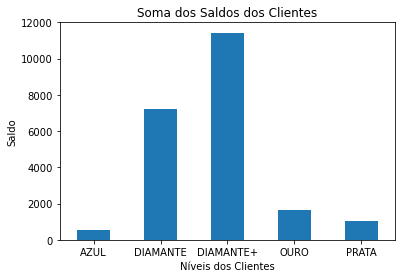

In [7]:
nivel1 = credito1.groupby(['DESCRICAO_NIVEL'])['SALDO_VC'].sum()
nivel1
nivel1.plot.bar()

plt.title('Soma dos Saldos dos Clientes')  #Titulo grafico
plt.xticks(rotation=0) #rodar o eixo x
plt.xlabel("Níveis dos Clientes") # Atribuir nome eixo x
plt.ylabel("Saldo") #Atribuir nome eixo y

Como grande parte dos clientes são Diamante+, conclui-se que o seus saldos serão bem maiores que os outros níveis.

### Dados Vale Credito Tabela 2
A segunda análise será com os dados vale credito tabela 2. Importar os dados para analise.

In [8]:
credito2 = pd.read_csv('Dados_vale_credito_tabela2.csv')
credito2

,CLIENTE,DEBITO_OU_CREDITO,TIPO_TRANSACAO_VC,ID_LISTA_PRESENTES,PEDIDO_BOL,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,FATURA,DATA_CRIACAO,LOJA
0,3059785,CREDITO,CREDITO_POR_TROCO,0,0,0.37,0.37,BRL,2019-11-03,157999405.0,2019-11-03,118.0
1,197026,CREDITO,CREDITO_POR_TROCO,0,0,0.39,3.20,BRL,2017-11-20,144328614.0,2017-11-20,500.0
2,2435219,CREDITO,CREDITO_POR_TROCO,0,0,1.15,1.15,BRL,2020-08-05,163994206.0,2020-08-05,106.0
3,1736644,CREDITO,CREDITO_POR_TROCO,0,0,0.15,2.66,BRL,2017-08-20,142898316.0,2017-08-20,118.0
4,2010537,DEBITO,DEBITO_PAGAMENTO_COM_VC,0,0,-0.50,0.00,BRL,2017-08-08,NaN,2017-08-08,401.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380319,1046303,CREDITO,CREDITO_POR_TROCO,0,0,0.90,0.90,BRL,2018-02-15,145954646.0,2018-02-15,202.0
380320,155516,DEBITO,DEBITO_PAGAMENTO_COM_VC,0,0,-0.20,0.75,BRL,2018-12-06,NaN,2018-12-06,101.0
380321,2087858,CREDITO,CREDITO_POR_TROCO,0,0,0.23,0.47,BRL,2018-11-27,151060807.0,2018-11-27,106.0
380322,2133650,CREDITO,CREDITO_GERADO_POR_COMPRA_DE_VC,0,0,85.00,88.35,BRL,2020-10-03,165519100.0,2020-10-03,520.0


Observando os resultados abaixo temos que a proporção de pagamento por CREDITO com o tipo de CREDITO_POR_TROCO é 61,75%, é o que mais ocorre durante as compras nas lojas da Bemol. Com a opção de pagamento DEBITO com o tipo de transação DEBITO_PAGAMENTO_COM_VC é um meio menos usado, com proporção de 14,93%.

In [9]:
pag = credito2.groupby(['DEBITO_OU_CREDITO'])['TIPO_TRANSACAO_VC'].value_counts()
media_pag=pag/len(credito2)*100
media_pag

DEBITO_OU_CREDITO  TIPO_TRANSACAO_VC                          
CREDITO            CREDITO_POR_TROCO                              61.756555
                   CREDITO_GERADO_POR_COMPRA_DE_VC                 6.325133
                   CREDITO_POR_COMPRA_LISTA_PRESENTES              1.788738
                   DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC            0.263985
                   CREDITO_PREMIACAO_FUNCIONARIO                   0.183265
                   CREDITO_PREMIACAO_GERENCIAL_CLIENTES            0.161704
                   AJUSTE_CONTABIL_OU_LANCAM_INCORRETO             0.096760
                   CREDITO_GERADO_DEVOLUCAO_COMPRAS                0.041018
                   CREDITO_CONVERSAO_CRED_GERADO_DEVOLUCAO         0.013673
                   TRANSFERENCIA_ENTRE_CLIENTES_BEMOL              0.009466
                   AJUSTE_LANCAMENTO_INCORRETO                     0.003944
                   TRANSFERENCIA_ENTRE_CLIENTES_BEMOL_WHATSAPP     0.003681
                   DEBITO

In [10]:
type(credito2["TIPO_TRANSACAO_VC"])
p = credito2["TIPO_TRANSACAO_VC" ].value_counts()
b = (p/len(credito2))*100
b

CREDITO_POR_TROCO                              61.756555
DEBITO_PAGAMENTO_COM_VC                        14.934635
DEBITO_COMPRA_COM_VC                            8.569273
CREDITO_GERADO_POR_COMPRA_DE_VC                 6.325133
DEBITO_AUTOMATICO_PAG_PRESTACOES                5.815831
CREDITO_POR_COMPRA_LISTA_PRESENTES              1.788738
DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC            0.263985
CREDITO_PREMIACAO_FUNCIONARIO                   0.183265
CREDITO_PREMIACAO_GERENCIAL_CLIENTES            0.161704
AJUSTE_CONTABIL_OU_LANCAM_INCORRETO             0.097023
CREDITO_GERADO_DEVOLUCAO_COMPRAS                0.041018
TRANSFERENCIA_ENTRE_CLIENTES_BEMOL              0.020772
CREDITO_CONVERSAO_CRED_GERADO_DEVOLUCAO         0.013673
TRANSFERENCIA_ENTRE_CLIENTES_BEMOL_WHATSAPP     0.008677
DEBITO_DEVOLUCAO_COMPRA_DE_VC                   0.006573
DEBITO_POR_ESTORNO_TROCO                        0.004207
DEBITO_ESTORNO_LISTA_PRESENTES                  0.004207
AJUSTE_LANCAMENTO_INCORRETO    

In [11]:
# Separar e criar a coluna DATA_CRIAÇAO por ano e mes
credito2['DATA_DA_MOVIMENTACAO'] = pd.to_datetime(credito2['DATA_DA_MOVIMENTACAO'], 
                                                  format='%Y/%m/%d')
credito2['ANO'] = credito2['DATA_DA_MOVIMENTACAO'].dt.year ## cria coluna por ano
credito2['MES'] = credito2['DATA_DA_MOVIMENTACAO'].dt.month ## cria coluna por mes

,CLIENTE,DEBITO_OU_CREDITO,TIPO_TRANSACAO_VC,ID_LISTA_PRESENTES,PEDIDO_BOL,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,FATURA,DATA_CRIACAO,LOJA,ANO,MES
0,3059785,CREDITO,CREDITO_POR_TROCO,0,0,0.37,0.37,BRL,2019-11-03,157999405.0,2019-11-03,118.0,2019,11
1,197026,CREDITO,CREDITO_POR_TROCO,0,0,0.39,3.20,BRL,2017-11-20,144328614.0,2017-11-20,500.0,2017,11
2,2435219,CREDITO,CREDITO_POR_TROCO,0,0,1.15,1.15,BRL,2020-08-05,163994206.0,2020-08-05,106.0,2020,8
3,1736644,CREDITO,CREDITO_POR_TROCO,0,0,0.15,2.66,BRL,2017-08-20,142898316.0,2017-08-20,118.0,2017,8
4,2010537,DEBITO,DEBITO_PAGAMENTO_COM_VC,0,0,-0.50,0.00,BRL,2017-08-08,NaN,2017-08-08,401.0,2017,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380319,1046303,CREDITO,CREDITO_POR_TROCO,0,0,0.90,0.90,BRL,2018-02-15,145954646.0,2018-02-15,202.0,2018,2
380320,155516,DEBITO,DEBITO_PAGAMENTO_COM_VC,0,0,-0.20,0.75,BRL,2018-12-06,NaN,2018-12-06,101.0,2018,12
380321,2087858,CREDITO,CREDITO_POR_TROCO,0,0,0.23,0.47,BRL,2018-11-27,151060807.0,2018-11-27,106.0,2018,11
380322,2133650,CREDITO,CREDITO_GERADO_POR_COMPRA_DE_VC,0,0,85.00,88.35,BRL,2020-10-03,165519100.0,2020-10-03,520.0,2020,10


Se analisarmos os a coluna DEBITO_OU_CREDITO por ano, é possivel notar que com o passar do ano ocorreu uma queda consideravel no ano de 2018. A partir disso, observa-se que tem uma tendêcia de aumento nos anos seguintes.

<AxesSubplot:xlabel='ANO'>

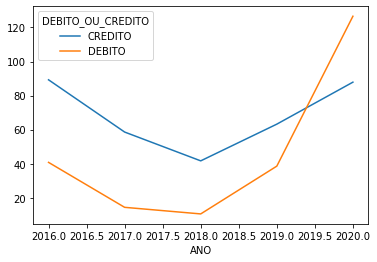

In [13]:
credito2.groupby(['ANO','DEBITO_OU_CREDITO'])['SALDO'].mean().unstack().plot()

Nessa etapa é coletado os dados dos últimos 6 meses para ver como anda o comportamento.

In [14]:
seis_m = credito2[(credito2['DATA_CRIACAO'] > '2020-05-19') & 
                  (credito2['DATA_CRIACAO'] < '2020-10-18')]
seis_m

,CLIENTE,DEBITO_OU_CREDITO,TIPO_TRANSACAO_VC,ID_LISTA_PRESENTES,PEDIDO_BOL,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,FATURA,DATA_CRIACAO,LOJA,ANO,MES
2,2435219,CREDITO,CREDITO_POR_TROCO,0,0,1.15,1.15,BRL,2020-08-05,163994206.0,2020-08-05,106.0,2020,8
6,1463581,DEBITO,DEBITO_AUTOMATICO_PAG_PRESTACOES,0,0,-2.06,0.00,BRL,2020-06-09,NaN,2020-06-09,100.0,2020,6
20,2045570,DEBITO,DEBITO_COMPRA_COM_VC,0,0,-1.02,0.02,BRL,2020-06-29,NaN,2020-06-29,120.0,2020,6
30,2584422,DEBITO,DEBITO_AUTOMATICO_PAG_PRESTACOES,0,0,-0.15,0.00,BRL,2020-09-17,NaN,2020-09-17,100.0,2020,9
31,1029149,DEBITO,DEBITO_AUTOMATICO_PAG_PRESTACOES,0,0,-0.72,0.00,BRL,2020-06-22,NaN,2020-06-22,100.0,2020,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380264,2149641,CREDITO,CREDITO_POR_TROCO,0,0,0.50,1.52,BRL,2020-06-09,162607558.0,2020-06-09,118.0,2020,6
380272,2320696,DEBITO,DEBITO_AUTOMATICO_PAG_PRESTACOES,0,0,-59.00,60.76,BRL,2020-10-04,NaN,2020-10-04,100.0,2020,10
380296,1132474,CREDITO,CREDITO_POR_TROCO,0,0,0.59,1.08,BRL,2020-10-15,165896093.0,2020-10-15,103.0,2020,10
380306,2609691,CREDITO,CREDITO_POR_TROCO,0,0,0.13,0.13,BRL,2020-09-12,164993989.0,2020-09-12,115.0,2020,9


A análise será feita atraves das médias do saldo dos clientes por debito e credito. Como é visto o gráfico abaixo nos ultimos 6 meses teve um crescimento de saldo dos clientes, podendo ser possivel a compra de mais vale crédito.

<AxesSubplot:xlabel='MES'>

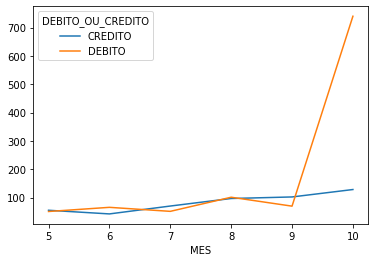

In [15]:
seis_m.groupby(['MES','DEBITO_OU_CREDITO'])['SALDO'].mean().unstack().plot()
plt.ylabel("Saldo") #Atribuir nome eixo y
plt.title('Media de saldo nos ultimos 6 meses')  #Titulo grafico

A proxima analise a ser feita é tentar obter uma previsão dos saldo dos clientes. O gráfico abaixo informa uma serie das médias dos ultimos anos por meses, é notório que grande parte dos anos não passava da média 100.

Text(0.5, 1.0, 'Série da média do saldo nos ultimos anos')

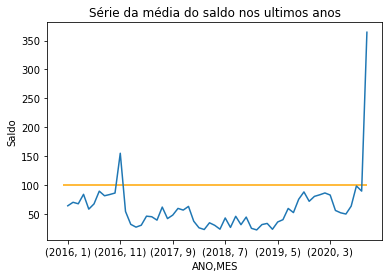

In [39]:
credito2.groupby(['ANO','MES'])['SALDO'].mean().plot()
plt.hlines(y=100, xmin=-1, xmax=57, color='orange')
#credito2.groupby(['ANO','MES'])['SALDO'].mean()   ##resultado das médias 

plt.ylabel("Saldo") #Atribuir nome eixo y
plt.title('Série da média do saldo nos ultimos anos')  #Titulo grafico

Para realizar a previsão será feita um filtro no ano em um perio de 02/01/2016-20020/05/18. Deixando uns últimos 6 meses para prever.

In [112]:
type(credito2[["ANO",'MES']])

credito2[["ANO",'MES']].sum()

ANO    767675305
MES      2524760
dtype: int64

O método da média movel foi aplicado ao saldo dos clientes para prever o comportamento nesses periodo.

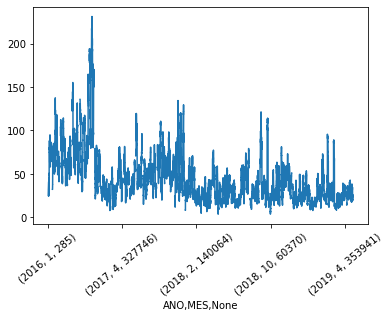

In [127]:
pred = credito2[(credito2['DATA_CRIACAO'] > '2016-01-02') & 
                  (credito2['DATA_CRIACAO'] < '2019-05-18')]
m = pred.groupby(['ANO','MES'])['SALDO'].mean()
mm = pred.groupby(['ANO','MES'])['SALDO'].rolling(600).mean().plot(rot=40)


O gráfico abaixo mostra as médias do saldo dos clientes no periodo de 2016 a 2019.

<AxesSubplot:xlabel='ANO,MES'>

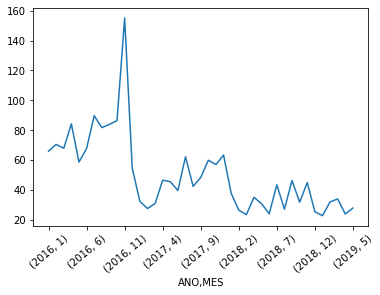

In [126]:
m.plot(rot=40)

In [ ]:
Se fizer uma comparação do gráfico das médias móveis e da médias, conclui-se que tem uma estabalização no saldos dos clientes.